##### Author: Vincent Yeo

### Credit Card Fraud Detection

#### Background:
As a credit card company, it is important to offer consumer protection against fradulent transaction so that consumers don't pay for purchases that they did not make.


#### Dataset
+ by Machine Learning Group - ULB at [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv)

#### Task:

Classify which transaction is fradulent.

In [73]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(os.getcwd() + '/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Below is a table describing each variable:

|Variable | Description|
|----------|-------------|
|Time| Time elapsed between observed transaction and the first transaction in the dataset in seconds |
|V1-V28| Principal Components of features "to protect user identities and sensitive features" |
|Amount| The amount transacted using the credit card
| Class | The target variable (1 for fraud, 0 otherwise)

#### Exploratory Data Analysis

In [5]:
df.info()
# There are no missing data since dataset has been treated with PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [7]:
df['Amount'].describe()
# The average transaction is $88

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df['Class'].describe()
# Labels are correct

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

We are told that
+  There are 492 frauds out of 284,807 transactions. 
+ Thus, the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Now to visualize it

   Class   Count
0      0  284315
1      1     492


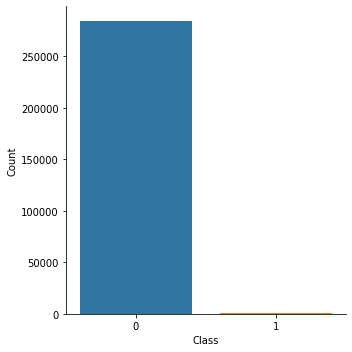

In [8]:
count = df[['Class', 'V1']].groupby('Class').count().reset_index()
count.columns = ['Class', 'Count']
print(count)
sns.catplot(x='Class', y='Count', data=count, kind='bar')
# So we need to handle this imbalanced dataset using either oversampling or undersampling techniques

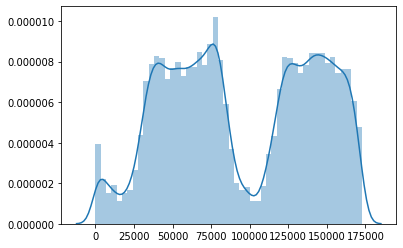

In [9]:
# Distribution of Time
sns.distplot(df[['Time']])
# Both normal and fraudulent time

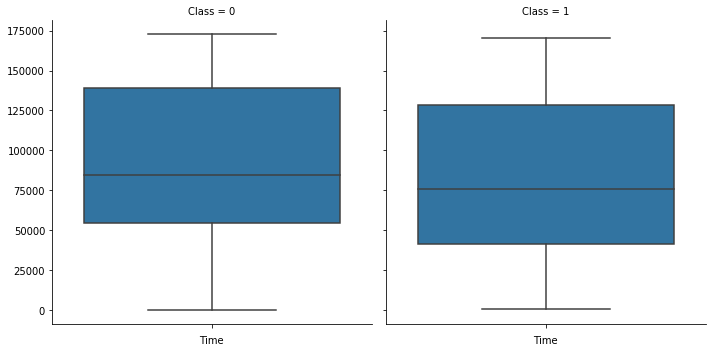

In [10]:
sns.catplot(x='Time', col='Class', data=df, kind='box', orient='v')

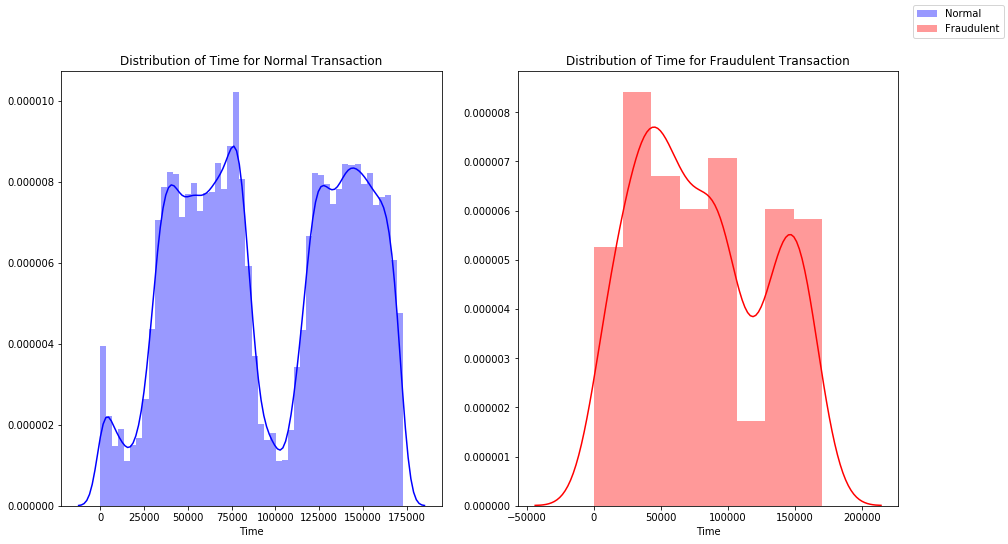

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(15,8))
sns.distplot(df.loc[df['Class'] == 0]['Time'], ax=ax[0], color='blue').set_title('Distribution of Time for Normal Transaction')
sns.distplot(df.loc[df['Class'] == 1]['Time'], ax=ax[1], color='red').set_title('Distribution of Time for Fraudulent Transaction')
fig.legend(labels=['Normal','Fraudulent'])

plt.show()

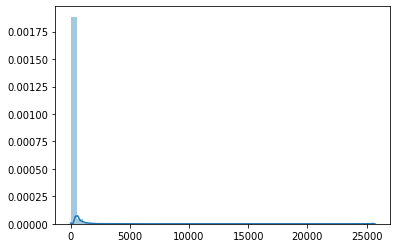

In [12]:
# Distribution of Amount
sns.distplot(df[['Amount']])

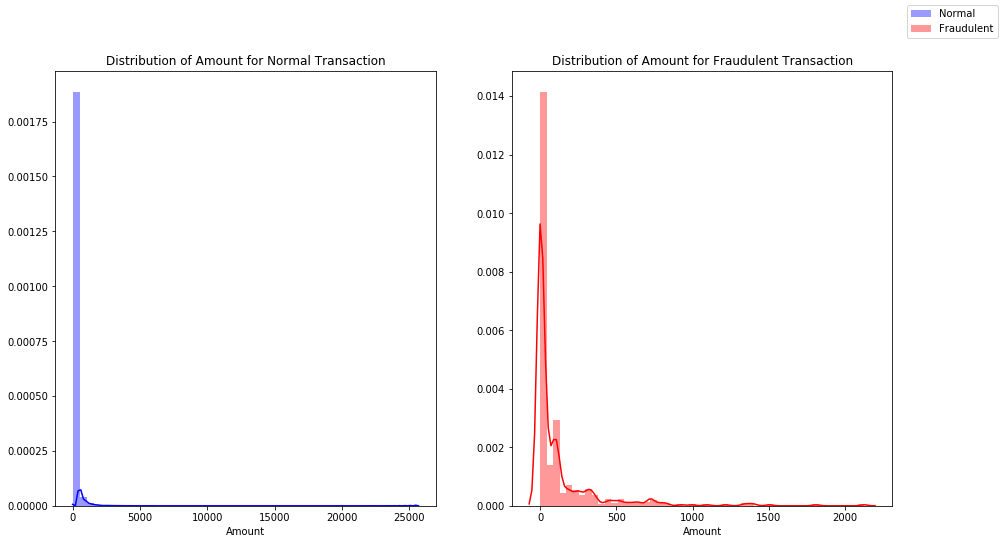

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(15,8))
sns.distplot(df.loc[df['Class'] == 0]['Amount'], ax=ax[0], color='blue').set_title('Distribution of Amount for Normal Transaction')
sns.distplot(df.loc[df['Class'] == 1]['Amount'], ax=ax[1], color='red').set_title('Distribution of Amount for Fraudulent Transaction')
fig.legend(labels=['Normal','Fraudulent'])

plt.show()

#### Model Building and Evaluation

In [62]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold


##### Data Preparation

In [15]:
X = df[df.columns[:-1]]
y = df[['Class']]

print(X.shape)
print(y.shape)

(284807, 30)
(284807, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1234)

In [17]:
y_train.columns

Index(['Class'], dtype='object')

In [18]:
y_test.columns

Index(['Class'], dtype='object')

In [19]:
# Check if y_test contains any fraudulent cases
y_test.loc[y_test['Class'] == 1].sum()

Class    98
dtype: int64

In [58]:
training_data = []

print("X_train size: ", X_train.shape[0])
print("X_test size: ",X_test.shape[0])
print("y_train size: ",y_train.shape[0])
print("y_test size:", y_test.shape[0])
# training_data.append((X_train.values, y_train.values))

X_train_oversampled, y_train_oversampled = SMOTE(random_state=1234).fit_sample(X_train, y_train)
print("X_train oversampled size:", len(X_train_oversampled))
print("y_train oversampled size:", len(y_train_oversampled))
# training_data.append((X_train_oversampled, y_train_oversampled))


X_train_undersampled, y_train_undersampled = RandomUnderSampler(random_state=1234).fit_sample(X_train, y_train)
print("X_train undersampled size:", len(X_train_undersampled))
print("y_train undersampled size:", len(y_train_undersampled))
training_data.append((X_train_undersampled, y_train_undersampled))

X_train size:  227845
X_test size:  56962
y_train size:  227845
y_test size: 56962
X_train oversampled size: 454902
y_train oversampled size: 454902
X_train undersampled size: 788
y_train undersampled size: 788


Notice that the size doubled when using oversampling technique than normal X_train and y_train which increase training time for the model.

Thus, we will use undersampled for training only since its smaller and its closer to the actual data with equal distribution of Fraud and non-fraud observations.

##### Evaluation Functions

In [21]:
from sklearn.metrics import roc_auc_score, auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, auc, precision_recall_curve, classification_report

In [60]:
def evaluateClassifier(model, X_test, y_test, printLines = True):
    
    y_pred = model.predict(X_test.values)
    
    accuracy = accuracy_score(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)
 
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    cm = pd.DataFrame(
        cm, 
        index=['True: Fraudulent', 'True: Not Fraudulent'], 
        columns=['Pred: Fraudulent', 'Pred: Not Fraudulent']
    )
    

    precision = precision_score(y_test, y_pred)

    # recall
    recall = recall_score(y_test, y_pred)


    # recall
    f1 = f1_score(y_test, y_pred, labels=['Survived'])
   
    
    if printLines:
        print("Model Accuracy on Test is {:.3f}".format(accuracy))
        print("Model AUC on Test is {:.3f} \n".format(auc))
        print(cm)
        print("\nThe precision of the classifier is {:.2%}".format(precision))
        print("\nThe recall of the classifier is {:.2%}".format(recall))
        print("\nThe f1 score of the classifier is {:.2%}\n".format(f1)) 
        
    return auc, cm, precision, recall, f1

In [90]:
def drawROC(estimator, X_test, y_test):
    y_prob = estimator.predict_proba(X_test) [:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)
    

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b')
#     , label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate: Sensitivity')
    plt.xlabel('False Positive Rate: (1-Specificity)')
    plt.show()


In [24]:
def drawPrecisionRecallCurve(estimator, X_test, y_test):
    y_prob = estimator.predict_proba(X_test) [:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, lw=2, label='Survived')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.title("Precision vs. Recall Curve")
    plt.show()

##### Model Building

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
estimators = []
hyperparams = []

In [46]:
import xgboost as xgb

xgb = Pipeline([('xgb', xgb.XGBClassifier())])

xgb_params = {
            'xgb__objective' : ['binary:logistic'],
            'xgb__max_depth': [5, 10, 25],
            'xgb__n_estimators': [10, 25, 40, 65, 100], 
            'xgb__seed': [1234]
          }

estimators.append(xgb)
hyperparams.append(xgb_params)

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1234)

lr_params = {
              'C': [0.5, 1],
              'solver': ['newton-cg', 'sag', 'lbfgs'],
              'max_iter': [100, 200, 300],
              'random_state': [1234]
             }

estimators.append(lr)
hyperparams.append(lr_params)

In [49]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc_params = {          
              'criterion': ['gini', 'entropy'], 
              'max_depth': [5, 7, 10], 
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 3, 5],
              'random_state': [1234]
             }
estimators.append(dtc)
hyperparams.append(dtc_params)

#### Model Evaluation

In [74]:
# evaluation = {
# #               'estimators': [],
#               'train_auc': [],
#               'test_auc': [],
# #               'confusion_matrix': [],
#               'precision': [],
#               'recall': [],
#               'f1':[]
#              }


# X = df[df.columns[:-1]]
# y = df[['Class']]

# for idx, est in enumerate(estimators):
#     estimator = GridSearchCV(est, hyperparams[idx], scoring='roc_auc', cv=5)
    
#     mean_performance = {'train_auc': [],
#               'test_auc': [],
#               'confusion_matrix': [],
#               'precision': [],
#               'recall': [],
#               'f1':[]
#              }
    
#     kf = KFold(n_splits=5)
    
#     for train_index, test_index in kf.split(X):
#         X_train_undersampled, y_train_undersampled = RandomUnderSampler(random_state=1234).fit_sample(X.iloc[train_index], y.iloc[train_index])
# #         print("X_train undersampled size:", len(X_train_undersampled))
# #         print("y_train undersampled size:", len(y_train_undersampled))

#         estimator.fit(X_train_undersampled, y_train_undersampled)
        
# #         evaluation['estimators'].append(estimator)

# #         print("\nEstimator {} Best Hyperparams: \n{}\n".format(idx+1, estimator.best_params_))
# #         print("Estimator {} Best Training Score: {}".format(idx+1, estimator.best_score_))

#         auc, cm, precision, recall, f1 = evaluateClassifier(estimator.best_estimator_, X.iloc[test_index], y.iloc[test_index], printLines = False)
#         mean_performance['train_auc'].append(estimator.best_score_)
#         mean_performance['test_auc'].append(auc)
#         mean_performance['confusion_matrix'].append(confusion_matrix)
#         mean_performance['precision'].append(precision)
#         mean_performance['recall'].append(recall)
#         mean_performance['f1'].append(f1)
    
#     evaluation['train_auc'].append(np.mean(mean_performance['train_auc']))
#     evaluation['test_auc'].append(np.mean(mean_performance['train_auc']))
# #     evaluation['confusion_matrix'].append(confusion_matrix)
#     evaluation['precision'].append(np.mean(mean_performance['precision']))
#     evaluation['recall'].append(np.mean(mean_performance['recall']))
#     evaluation['f1'].append(np.mean(mean_performance['f1']))

In [72]:
# performances = pd.DataFrame(evaluation)
# performances

,train_auc,test_auc,precision,recall,f1
0,0.971433,0.971433,0.041207,0.912878,0.078276
1,0.969486,0.969486,0.054688,0.905485,0.097396
2,0.941402,0.941402,0.020136,0.876693,0.039176


In [77]:
from sklearn.model_selection import GridSearchCV

evaluation = {'estimators': [],
              'train_auc': [],
              'test_auc': [],
              'confusion_matrix': [],
              'precision': [],
              'recall': [],
              'f1':[]
             }

for idx, est in enumerate(estimators):
    estimator = GridSearchCV(est, hyperparams[idx], scoring='roc_auc', cv=5)
    print("GridSearch Done")
    
    for train in training_data: 
        estimator.fit(train[0], train[1])
        print("Estimator Trained Done")
        evaluation['estimators'].append(estimator)

        print("\nEstimator {} Best Hyperparams: \n{}\n".format(idx+1, estimator.best_params_))
        print("Estimator {} Best Training Score: {}".format(idx+1, estimator.best_score_))
        auc, cm, precision, recall, f1 = evaluateClassifier(estimator.best_estimator_, X_test, y_test)
        evaluation['train_auc'].append(estimator.best_score_)
        evaluation['test_auc'].append(auc)
        evaluation['confusion_matrix'].append(confusion_matrix)
        evaluation['precision'].append(precision)
        evaluation['recall'].append(recall)
        evaluation['f1'].append(f1)

GridSearch Done
Estimator Trained Done

Estimator 1 Best Hyperparams: 
{'xgb__max_depth': 5, 'xgb__n_estimators': 65, 'xgb__objective': 'binary:logistic', 'xgb__seed': 1234}

Estimator 1 Best Training Score: 0.9801999976934115
Model Accuracy on Test is 0.962
Model AUC on Test is 0.945 

                      Pred: Fraudulent  Pred: Not Fraudulent
True: Fraudulent                    91                     7
True: Not Fraudulent              2180                 54684

The precision of the classifier is 4.01%

The recall of the classifier is 92.86%

The f1 score of the classifier is 7.68%

GridSearch Done
Estimator Trained Done

Estimator 2 Best Hyperparams: 
{'C': 1, 'max_iter': 100, 'random_state': 1234, 'solver': 'newton-cg'}

Estimator 2 Best Training Score: 0.9765634138826967
Model Accuracy on Test is 0.963
Model AUC on Test is 0.951 

                      Pred: Fraudulent  Pred: Not Fraudulent
True: Fraudulent                    92                     6
True: Not Fraudulent       

In [78]:
performances = pd.DataFrame(evaluation)
performances

,estimators,train_auc,test_auc,confusion_matrix,precision,recall,f1
0,"GridSearchCV(cv=5, error_score='raise-deprecat...",0.980200,0.945117,<function confusion_matrix at 0x1a20674680>,0.040070,0.928571,0.076826
1,"GridSearchCV(cv=5, error_score='raise-deprecat...",0.976563,0.951011,<function confusion_matrix at 0x1a20674680>,0.042163,0.938776,0.080702
2,"GridSearchCV(cv=5, error_score='raise-deprecat...",0.951617,0.929888,<function confusion_matrix at 0x1a20674680>,0.022733,0.928571,0.044379


#### Results and Analysis

|Model|Test AUC|Precision|Recall| F1-Score|
|-----|--------|---------|------|--------|
| Xgboost| 0.945 | 4.00% | 92.85% | 7.68% |
| Logistic Regression| 0.951 | 4.21% | 93.87% | 8.07% |
| Decision Tree Classifier | 0.929 | 2.27% | 92.85% | 4.43% |


Logistic Regression has the overall best performance of Test AUC of 0.951 using undersampled data

##### Intepretation of the Best Classifier
Based on precision, each prediction of either "Fraudulent", or "Not Fraudulent" would be realised truely about 4.21% of the time.

Based on recall, each prediction of "Fraudulent" has about 93.87% being correct.

Based on f1 score of the "Fraudulent", the weighted average of the precision and recall is 8.07%

##### Confusion Matrix of the Logistic Regression model:

| |Pred: Fraudulent  | Pred: Not Fraudulent|
|-------|-------|-------|
|True: Fraudulent  |  92  | 6|
|True: Not Fraudulent |2090  |54774|

No handles with labels found to put in legend.


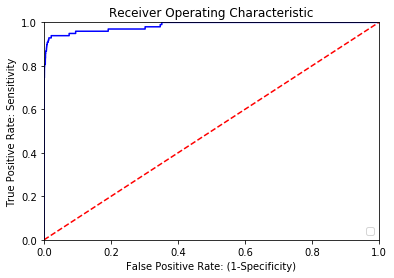

In [91]:
drawROC(performances['estimators'][1], X_test.values, y_test.values)


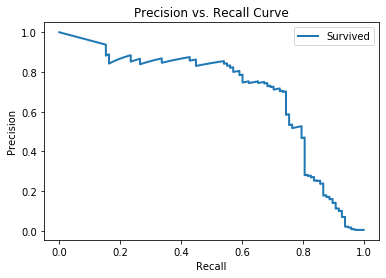

In [92]:
drawPrecisionRecallCurve(performances['estimators'][1], X_test.values, y_test.values)

#### Limitations and Future Works
